In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


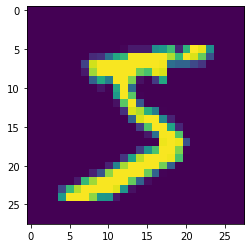

In [6]:
plt.imshow(X_train[0])

In [7]:
only_zeros = X_train[y_train ==0]

In [9]:
only_zeros.shape

(5923, 28, 28)

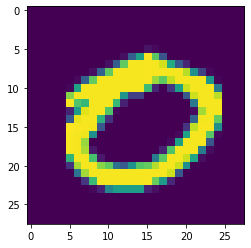

In [11]:
plt.imshow(only_zeros[14])

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [17]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
#784-->150-->100-->150-->784(decoder-->100-->generator)
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [19]:
GAN = Sequential([generator,discriminator])

In [20]:
discriminator.trainable = False

In [21]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
batch_size = 32

In [24]:
my_data = only_zeros

In [28]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [29]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [30]:
dataset= dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [31]:
epochs=1

In [37]:
GAN.layers[0].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [38]:
GAN.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [40]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on Epoch {epoch+1}")
  i = 0

  for X_batch in dataset:
    i = i+1
    if i%100 == 0:
      print(f"\t Currently on batch number {i} of (len(my_data)//batch_size)")

    noise = tf.random.normal(shape=[batch_size,codings_size])
    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    noise = tf.random.normal(shape=[batch_size,codings_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise,y2)


Currently on Epoch 1
	 Currently on batch number 100 of (len(my_data)//batch_size)


In [42]:
noise = tf.random.normal(shape=[10,codings_size])

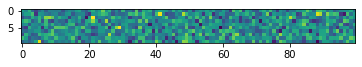

In [43]:
plt.imshow(noise)

In [44]:
images = generator(noise)

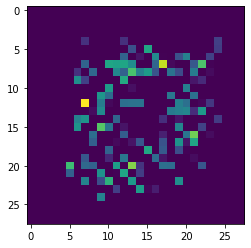

In [49]:
plt.imshow(images[4])